In [86]:
from keras import layers
from keras import regularizers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform
from matplotlib.pyplot import imshow
import pandas as pd
import os
import cv2
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

C:\Users\adarabi3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [87]:
X = pd.read_csv("freq_new.csv")
Y= pd.read_csv("out_50.csv")
X_data = X.to_numpy()
Y_data = Y.to_numpy()
print(X_data.shape)
print(Y_data.shape)

(5000, 50)
(5000, 2500)


In [88]:
def convert_to_one_hot(Y):
    n_values = np.max(Y)+1
    return np.squeeze(np.eye(n_values)[Y.reshape(-1)])

In [89]:
# X_final=convert_to_one_hot(X_data)
# print(X_final.shape)
# print(Y_data[-1])

In [90]:
x_train=X_data[0:4000]
x_test=X_data[4000:5001]
y_train=Y_data[0:4000]
y_test=Y_data[4000:5001]
y_train=y_train/10
y_test=y_test/10
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 50)
(1000, 50)
(4000, 2500)
(1000, 2500)


In [91]:
def DeepNet(input_shape = 50, classes=[1,1,1,1]):

    X_input = Input(input_shape)

    C1,C2,C3,C4=classes
    
    X = Dense(C1, activation='sigmoid', name='fc1' + str(C1), kernel_initializer = glorot_uniform(seed=0))(X_input)#,kernel_regularizer=tf.keras.regularizers.l1(0.1))(X)
    X = Dense(C2, activation='sigmoid', name='fc2' + str(C2))(X)
    X = Dense(C3, activation='sigmoid', name='fc3' + str(C3))(X)
    # X = Dense(C4, activation='sigmoid', name='fc4' + str(C4))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='DeepNet')

    return model

In [92]:
model = DeepNet(input_shape = 50, classes = [100,500,2500,2500])

In [93]:
# model.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])
# model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
model.summary()

Model: "DeepNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50)]              0         
                                                                 
 fc1100 (Dense)              (None, 100)               5100      
                                                                 
 fc2500 (Dense)              (None, 500)               50500     
                                                                 
 fc32500 (Dense)             (None, 2500)              1252500   
                                                                 
Total params: 1,308,100
Trainable params: 1,308,100
Non-trainable params: 0
_________________________________________________________________


In [95]:
rediction=model.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
125/125 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.0698
Epoch 2/500
125/125 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.1565
Epoch 3/500
125/125 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.1273
Epoch 4/500
125/125 [==============================] - 1s 8ms/step - loss: 4.4693e-04 - accuracy: 0.1735
Epoch 5/500
125/125 [==============================] - 1s 8ms/step - loss: 3.3104e-04 - accuracy: 0.2183
Epoch 6/500
125/125 [==============================] - 1s 9ms/step - loss: 2.9717e-04 - accuracy: 0.2192
Epoch 7/500
125/125 [==============================] - 1s 8ms/step - loss: 2.7861e-04 - accuracy: 0.2272
Epoch 8/500
125/125 [==============================] - 1s 9ms/step - loss: 2.6536e-04 - accuracy: 0.2272
Epoch 9/500
125/125 [==============================] - 1s 9ms/step - loss: 2.5328e-04 - accuracy: 0.2330
Epoch 10/500
125/125 [==============================] - 1s 8ms/step

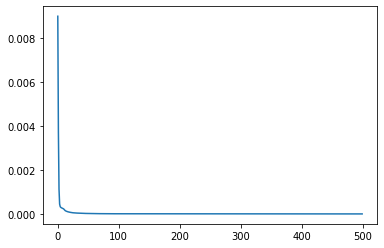

In [96]:
plt.plot(rediction.history["loss"])

In [97]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

32/32 [==============================] - 0s 3ms/step - loss: 1.5548e-06 - accuracy: 0.8680
Loss = 0.000001554798218421638
Test Accuracy = 0.86800000369548798


In [ ]:
X_data=x_train[2002]
X_data=X_data.reshape(50,-1).T
print(X_data.shape)
q=model.predict(X_data)
mse = tf.keras.losses.MeanAbsoluteError()
error=mse(q, y_train[2002]).numpy()
print(error)
print(q)
print(y_train[2002])